In [30]:
# Set up environment

## PS> cd <repo>
## PS> python -m venv venv
## PS> venv\Scripts\activate #  for linux/gitbash: source venv/Scripts/activate
## %pip install -r requirements.txt

# Load required packages
## (venv) $ python -m pip install dash==2.8.1 pandas==1.5.3

# streamlit run streamlit_app.py


In [1]:
%load_ext autoreload
%autoreload 2

# sys.path.insert(1, '../')

# Setup

In [2]:
from utils_logging import close_log_handlers

close_log_handlers()

In [3]:
import pandas as pd
import logging
import os

from utils_logging import setup_logging, close_log_handlers

# Setup logging
close_log_handlers()
setup_logging()
logger = logging.getLogger(__name__)


# Create the pickle_files directory if it doesn't exist
pkl_folder_name="pickle_files"
os.makedirs(pkl_folder_name, exist_ok=True)
logger.info(f"Folder '{pkl_folder_name}' has been created or already exists.")

INFO:__main__:Folder 'pickle_files' has been created or already exists.


# Read Yamls

In [4]:
from read_yaml_files import read_yamls

(
    aliases_dict,
    color_discrete_map,
    data_config_dict,
    date_column
) = read_yamls()

# Grouping Columns
company_column = data_config_dict['column_settings']['company_column'] # 'Institution Name'
default_company = data_config_dict['column_settings']['default_company'] # 'Macquarie Bank Limited'


# Load data

In [5]:
from utils import absolute_path

# Delete yamls whilst testing
for file in [
    absolute_path(dir="pickle_files\df_original.pkl"),
    absolute_path(dir="pickle_files\df_cleaned.pkl"),
    absolute_path(dir="pickle_files\df_summary.pkl"),
]:
    if os.path.exists(file):
        os.remove(file)


In [6]:
from data_loading import data_loader

# Get data
df_original, df_cleaned, df_summary = data_loader(
    pkl_folder_name=pkl_folder_name,
    data_config_dict=data_config_dict,
    date_column=date_column,
)
# TO DO: add in check that companies are all unique - if not, make them (add abn)

INFO:data_loading:Executing: data_loader
INFO:data_loading:Loading data from APRA website
INFO:data_loading:Excel file has already been downloaded.
INFO:data_loading:Excel data loaded successfully.
c:\Users\tyewf\github_projects\apra_monthly_adi_statistics\data_loading.py:291: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start=df_cleaned[date_column].min(), end=df_cleaned[date_column].max(), freq='M')
INFO:data_loading:Executed: data_loader


In [7]:
from utils import absolute_path

# Delete yamls whilst testing
for file in [
    absolute_path(dir="pickle_files\df_original.pkl"),
    absolute_path(dir="pickle_files\df_cleaned.pkl"),
    absolute_path(dir="pickle_files\df_summary.pkl"),
]:
    if os.path.exists(file):
        os.remove(file)


## Sub-processes

In [25]:
# Arguments
data_config_dict
date_column
pkl_folder_name

'pickle_files'

In [26]:
from data_loading import load_url_xlsx

original_file_name=load_url_xlsx()
original_file_name

INFO:data_loading:Excel file has already been downloaded.


'data/madis_March_2024.xlsx'

### read and process data

In [27]:
from data_loading import read_and_process_data

# Read and process data
df_original = read_and_process_data(
    data_config_dict=data_config_dict,
    file_name=original_file_name,
    date_column=date_column,
)

df_original[0:5]

INFO:data_loading:Excel data loaded successfully.


,Period,ABN,Institution Name,Cash and deposits with financial institutions,Trading securities,Investment securities,Net acceptances of customers,Total residents assets,Total securitised assets on balance sheet,Loans to non-financial businesses,...,Negotiable Certificates of Deposit,Total short-term borrowings,Total long-term borrowings,Deposits by non-financial businesses,Deposits by financial institutions,Deposits by general government,Deposits by households,Deposits by community service organisations,Total residents deposits,Business Loans
7669,2019-03-31,94150148299,Woori Bank,30900000.0,0.0,29200000.0,0.0,3.945000e+08,0.000000e+00,3.506000e+08,...,0.000000e+00,4.240000e+07,0.000000e+00,7.180000e+07,0.0,0.0,5.000000e+05,1300000.0,7.360000e+07,3.506000e+08
7577,2019-03-31,15087651143,Community CPS Australia Limited,98700000.0,0.0,742600000.0,0.0,6.763900e+09,1.655000e+09,1.638000e+08,...,0.000000e+00,1.000000e+06,0.000000e+00,5.002000e+08,165300000.0,96900000.0,3.643800e+09,113400000.0,4.519700e+09,2.392000e+08
7578,2019-03-31,80087649938,Community First Credit Union Limited,59200000.0,0.0,123100000.0,0.0,1.059200e+09,0.000000e+00,3.200000e+06,...,0.000000e+00,1.000000e+05,0.000000e+00,1.387000e+08,2000000.0,0.0,8.127000e+08,10400000.0,9.638000e+08,3.200000e+06
7579,2019-03-31,70003917655,Cooperatieve Rabobank U.A.,63900000.0,190100000.0,285600000.0,0.0,1.245400e+10,0.000000e+00,4.781200e+09,...,1.265200e+09,4.780000e+09,5.986400e+09,2.280000e+07,375300000.0,0.0,0.000000e+00,0.0,3.981000e+08,4.781200e+09
7580,2019-03-31,17061700712,Credit Suisse AG,87900000.0,786600000.0,0.0,0.0,6.557700e+09,0.000000e+00,2.760100e+09,...,3.990000e+07,5.049300e+09,3.008500e+09,1.924000e+09,332700000.0,0.0,3.291000e+08,0.0,2.585900e+09,3.958000e+09


### Generate Summary

In [28]:
from data_loading import generate_summary

# Generate summary data frame
df_summary = generate_summary(
        df=df_original,
        date_column=date_column,
        data_config_dict=data_config_dict,
)

In [29]:
df_summary[0:2]

,Period,Cash and deposits with financial institutions,Trading securities,Investment securities,Net acceptances of customers,Total residents assets,Total securitised assets on balance sheet,Loans to non-financial businesses,Loans to financial institutions,Loans to general government,...,Deposits by non-financial businesses,Deposits by financial institutions,Deposits by general government,Deposits by households,Deposits by community service organisations,Total residents deposits,Business Loans,Total Loans for Housing,Loans to Housing: Owner-occupied Property Percentage,Loans to Housing: Investment Property Percentage
0,2019-03-31,7.147850e+10,1.440137e+11,3.324018e+11,261600000.0,4.041000e+12,5.216342e+11,7.608791e+11,1.379800e+11,5.132000e+09,...,5.662527e+11,4.268540e+11,6.825570e+10,9.475580e+11,3.060230e+10,2.039523e+12,8.988591e+11,1.709224e+12,0.619733,0.380267
1,2019-04-30,6.741980e+10,1.380200e+11,3.335516e+11,317200000.0,4.036934e+12,5.412223e+11,7.626436e+11,1.332940e+11,4.928200e+09,...,5.667469e+11,4.287321e+11,6.671510e+10,9.499294e+11,3.059880e+10,2.042721e+12,8.959376e+11,1.713047e+12,0.620398,0.379602


### Generate Original

In [30]:
from data_loading import generate_cleaned_df

# Generate original data frame
df_cleaned = generate_cleaned_df(
    df=df_original,
    date_column=date_column,
    data_config_dict=data_config_dict,
)

df_cleaned[0:2]

c:\Users\tyewf\github_projects\apra_monthly_adi_statistics\data_loading.py:291: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start=df_cleaned[date_column].min(), end=df_cleaned[date_column].max(), freq='M')


,Period,Institution Name,Cash and deposits with financial institutions,Trading securities,Investment securities,Net acceptances of customers,Total residents assets,Total securitised assets on balance sheet,Loans to non-financial businesses,Loans to financial institutions,...,Loans to community service organisations - Rank,Deposits by community service organisations - Rank,Net acceptances of customers - Rank,Intra-group loans and finance leases - Rank,Loans to households: Housing: Investment - Rank,Deposits by non-financial businesses - Rank,Loans to households: Housing: Owner-occupied - Rank,Total long-term borrowings - Rank,Acceptances - Rank,Loans to households: Credit cards - Rank
0,2019-03-31,Woori Bank,30900000.0,0.0,29200000.0,0.0,3.945000e+08,0.000000e+00,350600000.0,0.0,...,23,66,8,35,77,70,76,56,8,50
1,2019-03-31,Community CPS Australia Limited,98700000.0,0.0,742600000.0,0.0,6.763900e+09,1.655000e+09,163800000.0,75400000.0,...,27,17,8,31,23,30,21,56,8,24


# Select filters

In [8]:
# Arguments

# Date
print(f"date_column:{date_column}")
selected_date = pd.to_datetime('2023-12-31')
# Company
company_column = data_config_dict['column_settings']['company_column'] # 'Institution Name'
default_company = data_config_dict['column_settings']['default_company'] # 'Macquarie Bank Limited'
selected_company = default_company

# Top X
top_x_value = 15

print(f"selected_date:{selected_date}")
print(f"selected_company:{selected_company}")
print(f"top_x_value:{top_x_value}")

date_column:Period
selected_date:2023-12-31 00:00:00
selected_company:Macquarie Bank Limited
top_x_value:15


# Generate Summary Outputs

In [9]:
from calc_summary.calc_summary_outputs import generate_summary_outputs

summary_dict = generate_summary_outputs(
    df_summary=df_summary,
    pkl_folder_name=pkl_folder_name,
    date_column=date_column,
    selected_date=selected_date,
    top_x_value=top_x_value,
    data_config_dict=data_config_dict,
)

# summary_dict

INFO:calc_summary.calc_summary_outputs:Executing: generate_summary_outputs
INFO:calc_summary.calc_summary_outputs:Loading summary from pickle files


In [115]:
summary_dict['df_summary_output']

,Period,Cash and deposits with financial institutions,Trading securities,Investment securities,Net acceptances of customers,Total residents assets,Total securitised assets on balance sheet,Loans to non-financial businesses,Loans to financial institutions,Loans to general government,...,Deposits by financial institutions - movement,Deposits by general government - movement,Deposits by households - movement,Deposits by community service organisations - movement,Total residents deposits - movement,Business Loans - movement,Total Loans for Housing - movement,Loans to Housing: Owner-occupied Property Percentage - movement,Loans to Housing: Investment Property Percentage - movement,date_reference
17,2020-08-31,1.267999e+11,1.424447e+11,4.059920e+11,205100000.0,4.578001e+12,8.125458e+11,7.949628e+11,1.186064e+11,2.681100e+10,...,5.203710e+10,1.876580e+10,3.744258e+11,3.405900e+09,5.704078e+11,2.655821e+11,3.873475e+11,0.038182,-0.038182,long_term
45,2022-12-31,4.818866e+11,8.933100e+10,3.913061e+11,904200000.0,5.324649e+12,8.102827e+11,9.574374e+11,1.564566e+11,2.428540e+10,...,2.994500e+10,-1.430010e+10,9.992740e+10,1.404600e+09,1.186837e+11,6.525730e+10,9.706220e+10,0.004635,-0.004635,12_months
51,2023-06-30,4.419963e+11,9.177400e+10,3.898616e+11,709100000.0,5.351066e+12,7.813440e+11,9.864215e+11,1.578252e+11,2.739770e+10,...,9.091900e+09,-1.764710e+10,7.532620e+10,1.860500e+09,6.463750e+10,3.490460e+10,4.473140e+10,0.002345,-0.002345,6_months
56,2023-11-30,3.783372e+11,9.157700e+10,4.461174e+11,700100000.0,5.385614e+12,7.615941e+11,1.007751e+12,1.672067e+11,1.992650e+10,...,8.383500e+09,-3.568500e+09,1.145190e+10,-7.597000e+08,1.704510e+10,4.193600e+09,9.181100e+09,0.000532,-0.000532,1_month
57,2023-12-31,3.837163e+11,9.317160e+10,4.596707e+11,929400000.0,5.394376e+12,7.537521e+11,1.010301e+12,1.688503e+11,1.829080e+10,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,selected_date


### Generate summary loans dict

In [109]:
from outputs.calc_summary_outputs_loans import generate_summary_loans_dict
# Initialise summary dictionary
summary_dict = {}

# Generate df_summary_output for selected date
summary_dict['summary_loans_dict'] = generate_summary_loans_dict(
    df_summary_output=df_summary_output,
    date_column=date_column,
    selected_date=selected_date,
    reference_dates=reference_dates,
)

INFO:utils:7.37
INFO:utils:1.81
INFO:utils:35.2
INFO:utils:9.45
INFO:utils:75.3
INFO:utils:21.7
INFO:utils:330
INFO:utils:57.1


In [121]:
summary_loans_dict = {}

# List the loan columns
loan_column_names = [
    "Loans to non-financial businesses",
    "Loans to financial institutions",
    "Loans to general government",
    "Loans to households: Housing: Owner-occupied",
    "Loans to households: Housing: Investment",
    "Loans to households: Credit cards",
    "Loans to households: Other",
    "Loans to community service organisations",
]

In [146]:
from outputs.outputs_utils import generate_bar_chart

char = generate_bar_chart(
    df_summary_output=df_summary_output,
    selected_date=selected_date,
    loan_column_names=loan_column_names,
    category_column='Loan Category',
    columns_label = 'Total Loan Amount',
    marker_color='lightblue',
    title=f"Loan Category Totals as at {selected_date.strftime('%d %B %Y')}",
    yaxis_title='Total Loan Amount',
    margin_l=50,
    margin_r=200,
    margin_t=50,
    margin_b=180,
)

char

In [151]:
from outputs.calc_summary_outputs_loans import generate_loan_pos_neg_charts

# Generate Loans positive and negative movements charts
summary_loans_dict['loan_pos_neg_charts'] = generate_loan_pos_neg_charts(
    df_summary_output=df_summary_output,
    loan_column_names = loan_column_names,
    reference_dates=reference_dates,
    category_column='Loan Category',
    prior_label = 'Prior Month Total',
    movement_label = 'Movement - 1 Month',
)

In [154]:
reference_dates
df_summary_output.columns

Index(['Period', 'Cash and deposits with financial institutions',
       'Trading securities', 'Investment securities',
       'Net acceptances of customers', 'Total residents assets',
       'Total securitised assets on balance sheet',
       'Loans to non-financial businesses', 'Loans to financial institutions',
       'Loans to general government',
       'Loans to households: Housing: Owner-occupied',
       'Loans to households: Housing: Investment',
       'Loans to households: Credit cards', 'Loans to households: Other',
       'Loans to community service organisations',
       'Total residents loans and finance leases',
       'Intra-group loans and finance leases', 'Acceptances',
       'Intra-group deposits', 'Negotiable Certificates of Deposit',
       'Total short-term borrowings', 'Total long-term borrowings',
       'Deposits by non-financial businesses',
       'Deposits by financial institutions', 'Deposits by general government',
       'Deposits by households', 'Depos

In [152]:
#summary_loans_dict['loan_pos_neg_charts']['loan_pos_neg_chart_12_months']
#summary_loans_dict['loan_pos_neg_charts'].keys()
#summary_loans_dict['loan_pos_neg_charts']['loan_pos_neg_chart_1_month']
summary_loans_dict['loan_pos_neg_charts']['loan_pos_neg_chart_6_months']
#summary_loans_dict['loan_pos_neg_charts']['loan_pos_neg_chart_12_months']
#summary_loans_dict['loan_pos_neg_charts']['loan_pos_neg_chart_long_term']

In [ ]:
from outputs.calc_summary_outputs_loans import generate_housing_percentages_pie

# Generate housing percentage pic chart
summary_loans_dict['housing_percentages_pie'] = generate_housing_percentages_pie(
    df_summary_output,
    date_column,
    selected_date,
)

In [33]:
loan_column_names = [
    "Loans to non-financial businesses",
    "Loans to financial institutions",
    "Loans to general government",
    "Loans to households: Housing: Owner-occupied",
    "Loans to households: Housing: Investment",
    "Loans to households: Credit cards",
    "Loans to households: Other",
    "Loans to community service organisations",
]

loan_movement_column_names = [name + " - movement" for name in loan_column_names]
loan_movement_column_names

['Loans to non-financial businesses - movement',
 'Loans to financial institutions - movement',
 'Loans to general government - movement',
 'Loans to households: Housing: Owner-occupied - movement',
 'Loans to households: Housing: Investment - movement',
 'Loans to households: Credit cards - movement',
 'Loans to households: Other - movement',
 'Loans to community service organisations - movement']

In [401]:
summary_housing_info = {}

from utils import movement_text, dollar_movement_text, rounded_dollars

# df_summary_output['']
over_period = []
investment_movements = []
oo_movement = []
for period, descriptors in reference_dates.items():
    over_period.append(reference_dates[period]['over_period'])
    investment_movements.append(rounded_dollars(dollars=df_summary_output.loc[df_summary_output['date_reference'] == period, 'Loans to households: Housing: Investment - movement'].values[0]))
    oo_movement.append(rounded_dollars(dollars=df_summary_output.loc[df_summary_output['date_reference'] == period, 'Loans to households: Housing: Owner-occupied - movement'].values[0]))

data = {
    "Period": over_period,
    "Owner-Occupied Loans Increase": investment_movements,
    "Investment Property Loans Increase": oo_movement,
}

summary_housing_info['']
data


INFO:utils:1.81
INFO:utils:7.37
INFO:utils:9.45
INFO:utils:35.2
INFO:utils:21.7
INFO:utils:75.3
INFO:utils:57.1
INFO:utils:330


{'Period': ['Over the last month',
  'Over the last 6 months',
  'Over the last year',
  'Over the past 4 years'],
 'Owner-Occupied Loans Increase': ['$ 1.81 Bn',
  '$ 9.45 Bn',
  '$ 21.7 Bn',
  '$ 57.1 Bn'],
 'Investment Property Loans Increase': ['$ 7.37 Bn',
  '$ 35.2 Bn',
  '$ 75.3 Bn',
  '$ 330 Bn']}

In [ ]:
summary_housing_info = {}

from utils import movement_text, dollar_movement_text

# df_summary_output['']
over_period = []
investment_movements = []
oo_movement = []
for period, descriptors in reference_dates.items():
    over_period.extend(reference_dates[period]['over_period'])
    over_period = reference_dates[period]['over_period']
    
    investment_movement = df_summary_output.loc[df_summary_output['date_reference'] == period, 'Loans to households: Housing: Investment - movement'].values[0]
    oo_movement = df_summary_output.loc[df_summary_output['date_reference'] == period, 'Loans to Housing: Owner-occupied Property - movement'].values[0]

    summary_housing_info[f"housing_oo_i_movements_{period}"] = (
        over_period + " owner-occupied loans have " + dollar_movement_text(dollar_movement=oo_movement) +
        ", whilst investment property loans have " + dollar_movement_text(dollar_movement=investment_movement) + "."
    )
    # investment_movement = df_summary_output.loc[df_summary_output['date_reference'] == period, 'Loans to households: Housing: Investment - movement']
    # print()
    
    # summary_housing_info[f"housing_movements_investment_{period}"] = 


### Generate despoits summary dict

In [161]:
from outputs.calc_summary_outputs_deposits import generate_summary_deposits_dict
test = {}
test = generate_summary_deposits_dict(
        df_summary_output,
        date_column,
        selected_date,
        reference_dates,
)



{'deposit_totals_bar_chart': Figure({
     'data': [{'marker': {'color': 'lightblue'},
               'name': 'Total Deposit Amount',
               'type': 'bar',
               'x': array(['Deposits by non-financial businesses',
                           'Deposits by financial institutions', 'Deposits by general government',
                           'Deposits by households', 'Deposits by community service organisations'],
                          dtype=object),
               'y': array([7.9327950e+11, 5.3154790e+11, 1.1049160e+11, 1.4464121e+12,
                           3.2467300e+10])}],
     'layout': {'barmode': 'overlay',
                'margin': {'b': 180, 'l': 50, 'r': 200, 't': 50},
                'template': '...',
                'title': {'text': 'Deposit Category Totals as at 31 December 2023'},
                'xaxis': {'title': {'text': 'Deposit Category'}},
                'yaxis': {'title': {'text': 'Total Deposit Amount'}}}
 }),
 'deposit_pos_neg_charts': {'d

# Generate Company Outputs

In [81]:
from utils import absolute_path

entity_dict_pkl=os.path.join(
        pkl_folder_name,
        f"entity_pickle-{selected_date.strftime('%Y-%m-%d')}_{top_x_value}.pkl"
    )

# Delete yamls whilst testing
for file in [
    entity_dict_pkl,
]:
    if os.path.exists(file):
        os.remove(file)

In [73]:
df_cleaned
data_config_dict
value_columns_to_graph_list = data_config_dict['value_columns_to_graph'].keys()
print(f"date_column:{date_column}")
print(f"selected_date:{selected_date}")
print(f"company_column:{company_column}")
print(f"selected_company:{selected_company}")
print(f"top_x_value:{top_x_value}")

date_column:Period
selected_date:2023-12-31 00:00:00
company_column:Institution Name
selected_company:Macquarie Bank Limited
top_x_value:15


In [82]:
from calc_entity.calc_entity_outputs import generate_entity_outputs

entity_dict = generate_entity_outputs(
    df_cleaned=df_cleaned,
    date_column=date_column,
    selected_date=selected_date,
    company_column=company_column,
    selected_company=selected_company,
    top_x_value=top_x_value,
    pkl_folder_name=pkl_folder_name,
    data_config_dict=data_config_dict,
    color_discrete_map=color_discrete_map,
)

INFO:calc_entity.calc_entity_outputs:Executing: generate_entity_outputs
INFO:calc_entity.calc_entity_outputs:Creating empty entity dictionary
INFO:calc_entity.calc_entity_outputs:Performing entity calculations
INFO:calc_entity.calc_entity_outputs:col: Cash and deposits with financial institutions
INFO:calc_entity.calc_entity_outputs:top_x_companies:['National Australia Bank Limited', 'Westpac Banking Corporation', 'Australia and New Zealand Banking Group Limited', 'Commonwealth Bank of Australia', 'Macquarie Bank Limited', 'JPMorgan Chase Bank, National Association', 'HSBC Bank Australia Limited', 'Citibank, N.A.', 'Royal Bank of Canada', 'ING Bank (Australia) Limited', 'Bendigo and Adelaide Bank Limited', 'BNP Paribas', 'Mizuho Bank, Ltd.', 'State Street Bank and Trust Company', 'Bank of Queensland Limited']
INFO:calc_entity.calc_entity_outputs:company_order_list:['National Australia Bank Limited', 'Westpac Banking Corporation', 'Australia and New Zealand Banking Group Limited', 'Comm

In [98]:
# for key in entity_dict.keys():
#     print(key)

'Loans to non-financial businesses'
'Loans to financial institutions'
'Loans to general government'
'Loans to households: Housing: Owner-occupied'
'Loans to households: Housing: Investment'
'Loans to households: Credit cards'
'Loans to households: Other'
'Loans to community service organisations'
'Total residents loans and finance leases'

col_name = 'Total residents loans and finance leases'
entity_col_dict = entity_dict[col_name]
tab_dict = {}
tab_dict["Current balances"] = entity_col_dict['balances_fig']
keys = entity_col_dict.keys()
for period_key in data_config_dict['reference_dates_config'].keys():
    period_movement_key = f"{period_key} - dollar movements fig"
    if period_movement_key in keys:
        tab_dict[period_key] = entity_col_dict[period_movement_key]
        # st.plotly_chart(summary_dict['summary_loans_dict']['loan_pos_neg_charts']['loan_pos_neg_chart_1_month'], use_container_width=True)

tab_dict_list = list(tab_dict.keys())
len(tab_dict_list)

4

In [58]:
from calc_entity.calc_entity_outputs import graph_columns

graphed_columns_dict = graph_columns(
        df_cleaned=df_cleaned,
        date_column=date_column,
        selected_date=selected_date,
        company_column=company_column,
        selected_company=selected_company,
        top_x_value=top_x_value,
        value_columns_to_graph_list=value_columns_to_graph_list,
        color_discrete_map=color_discrete_map,
        data_config_dict=data_config_dict,
)

INFO:calc_entity.calc_entity_outputs:col: Cash and deposits with financial institutions
INFO:utils:5.15
INFO:utils:53.9
INFO:utils:4.94
INFO:utils:58.7
INFO:utils:2.32
INFO:utils:2.94
INFO:utils:2.70
INFO:utils:87.0
INFO:utils:2.42
INFO:utils:3.41
INFO:utils:3.01
INFO:utils:14.0
INFO:utils:20.5
INFO:utils:2.57
INFO:utils:87.9
INFO:utils:32.0
c:\Users\tyewf\github_projects\apra_monthly_adi_statistics\venv\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

INFO:utils:626
INFO:utils:4.10
INFO:utils:1.67
INFO:utils:6.94
INFO:utils:531
INFO:utils:458
INFO:utils:1.57
INFO:utils:7.34
INFO:utils:251
INFO:utils:2.21
INFO:utils:1.24
INFO:utils:4.82
INFO:utils:661
INFO:utils:45.6
INFO:utils:40.0
INFO:utils:4.25
c:\Users\tyewf\github_projects\apra_monthly_adi_statistics\venv\Lib\site-packages\plotly\expre

In [62]:
graphed_columns_dict.keys()
# graphed_columns_dict['Cash and deposits with financial institutions'].keys()

dict_keys(['Cash and deposits with financial institutions', 'Trading securities', 'Investment securities', 'Total residents assets', 'Total securitised assets on balance sheet', 'Loans to non-financial businesses', 'Loans to financial institutions', 'Loans to general government', 'Loans to households: Housing: Owner-occupied', 'Loans to households: Housing: Investment', 'Loans to households: Credit cards', 'Loans to households: Other', 'Loans to community service organisations', 'Total residents loans and finance leases', 'Intra-group loans and finance leases', 'Intra-group deposits', 'Negotiable Certificates of Deposit', 'Total short-term borrowings', 'Total long-term borrowings', 'Deposits by non-financial businesses', 'Deposits by financial institutions', 'Deposits by general government', 'Deposits by households', 'Deposits by community service organisations', 'Total residents deposits', 'Business Loans'])

In [12]:
from calc_entity.calc_entity_outputs import graph_columns

col_to_graph_df, col_to_graph_current_df, company_order_list, col_fig, col_to_graph, period_movements_dict = graph_columns(
#tst = graph_columns(
        df_cleaned=df_cleaned,
        date_column=date_column,
        selected_date=selected_date,
        company_column=company_column,
        selected_company=selected_company,
        top_x_value=top_x_value,
        value_columns_to_graph_list=value_columns_to_graph_list,
        color_discrete_map=color_discrete_map,
        data_config_dict=data_config_dict,
)

# col_to_graph_df
# tst

INFO:calc_entity.calc_entity_outputs:col: Cash and deposits with financial institutions
INFO:utils:87.9
INFO:utils:87.0
INFO:utils:58.7
INFO:utils:53.9
INFO:utils:32.0
INFO:utils:20.5
INFO:utils:14.0
INFO:utils:5.15
INFO:utils:4.94
INFO:utils:3.41
INFO:utils:3.01
INFO:utils:2.94
INFO:utils:2.70
INFO:utils:2.57
INFO:utils:2.42
INFO:utils:2.32
c:\Users\tyewf\github_projects\apra_monthly_adi_statistics\venv\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

INFO:utils:40.0
INFO:utils:7.34
INFO:utils:6.94
INFO:utils:4.10
INFO:utils:4.25
INFO:utils:661
INFO:utils:4.82
INFO:utils:626
INFO:utils:1.67
INFO:utils:2.21
INFO:utils:1.24
INFO:utils:458
INFO:utils:1.57
INFO:utils:45.6
INFO:utils:251
INFO:utils:531
c:\Users\tyewf\github_projects\apra_monthly_adi_statistics\venv\Lib\site-packages\plotly\expre

ValueError: list.remove(x): x not in list

In [31]:
col_to_graph_df
col_to_graph_current_df
company_order_list
col_fig
# col_to_graph
period_movements_dict['12_months - CAGR movements fig']

period_movements_dict.keys()

dict_keys(['1_month - dollar movements fig', '1_month - CAGR movements fig', '6_months - dollar movements fig', '6_months - CAGR movements fig', '12_months - dollar movements fig', '12_months - CAGR movements fig'])

In [ ]:
company_order_list

In [14]:
col_to_graph_current_df_original = col_to_graph_current_df.copy()

In [24]:
print(col_to_graph_df['Institution Name'])
print(col_to_graph_current_df['Institution Name'])
print(filtered_df)
print(col_to_graph_current_df)


0       Commonwealth Bank of Australia
1       Commonwealth Bank of Australia
2      National Australia Bank Limited
3      National Australia Bank Limited
4      National Australia Bank Limited
                    ...               
971               Royal Bank of Canada
972               Royal Bank of Canada
973               Royal Bank of Canada
974               Royal Bank of Canada
975               Royal Bank of Canada
Name: Institution Name, Length: 976, dtype: object
42                     National Australia Bank Limited
45                         Westpac Banking Corporation
125    Australia and New Zealand Banking Group Limited
132                     Commonwealth Bank of Australia
195                                              Other
253                             Macquarie Bank Limited
305          JPMorgan Chase Bank, National Association
460                        HSBC Bank Australia Limited
470                                     Citibank, N.A.
560                      

In [22]:
import numpy as np
from chart_generator import chart_selected_col_bar
from utils import rounded_dollars

col_to_graph_current_df = col_to_graph_current_df_original.copy()

col_to_graph_df
# col_to_graph_current_df
# col_to_graph
col_to_graph
selected_date

# Get the current values to use as comparison
## base_values = col_to_graph_current_df[col_to_graph].values
# col_to_graph_current_df[col_to_graph] = col_to_graph_current_df[col_to_graph].astype(str)

for period_key, period_values in data_config_dict['reference_dates_config'].items():
    print(f"period_key:{period_key}")
    print(f"period_values:{period_values}")
    

    # Calculate the month end date of the reference month based on months_int
    date_value = (pd.to_datetime(selected_date).date() - pd.DateOffset(months=period_values['info']['months_int'])) + pd.offsets.MonthEnd(0)
    print("Calculated month end date:", date_value)

    # Check if date_value exists in the date_column
    if date_value in col_to_graph_df[date_column].values:
        print("Do the calcs")
        reference_balance_col = f"{col_to_graph} - {period_key} - balance"
        ref_bal_mvmt_dol_col = f"{col_to_graph} - {period_key} - movement ($)"
        ref_bal_mvmt_dol_col_txt = f"{col_to_graph} - {period_key} - movement ($) - text"
        ref_bal_mvmt_perc_col = f"{col_to_graph} - {period_key} - CAGR (%)"
        ref_bal_mvmt_perc_col_txt = f"{col_to_graph} - {period_key} - CAGR (%) - text"

        # Merge the reference data data to the current df
        filtered_df = col_to_graph_df[col_to_graph_df[date_column] == date_value][[company_column, col_to_graph]].copy()
        filtered_df.rename(columns={col_to_graph: reference_balance_col}, inplace=True)
        col_to_graph_current_df = col_to_graph_current_df.merge(
            filtered_df,
            on=company_column,
            how='left',
        )

        # Create the dollar movement column
        col_to_graph_current_df[ref_bal_mvmt_dol_col] = (
            col_to_graph_current_df[col_to_graph] - col_to_graph_current_df[reference_balance_col]
        )

        # Create the percentage movement column with proper zero handling
        col_to_graph_current_df[ref_bal_mvmt_perc_col] = np.where(
            col_to_graph_current_df[reference_balance_col] != 0,
            ((1 + (col_to_graph_current_df[ref_bal_mvmt_dol_col] / col_to_graph_current_df[reference_balance_col])) ** (12 / period_values['info']['months_int'])) - 1,
            np.nan
        )

        # Movement text
        formatted_dollars  = col_to_graph_current_df[ref_bal_mvmt_dol_col].apply(rounded_dollars) # Apply rounding to dollar values directly
        formatted_percentages = col_to_graph_current_df[ref_bal_mvmt_perc_col].apply(lambda x: f"{x * 100:.1f}")
        col_to_graph_current_df[ref_bal_mvmt_dol_col_txt] = formatted_dollars + ' (CAGR: ' + formatted_percentages +  "%)"
        col_to_graph_current_df[ref_bal_mvmt_perc_col_txt] = formatted_percentages +  "% CAGR (" + formatted_dollars + ')'
        col_to_graph_current_df

        # Graph dollar movements
        dollar_movements_fig = chart_selected_col_bar(
            df=col_to_graph_current_df.copy(),
            category_column=company_column,
            reference_col=ref_bal_mvmt_dol_col,
            title = f"Dollar movements as at {selected_date.strftime('%d %B %Y')}",
            ordered_category_list=company_order_list,
            show_xaxis_labels = True,
            x_tickformat = None,
            x_gridcolor = 'Grey',
            color_discrete_map=color_discrete_map,
            xaxis_title=f"Dollar movements {period_values['info']['over_period'].lower()}"
        )

        # Graph percentage movements
        percentage_movements_fig = chart_selected_col_bar(
            df=col_to_graph_current_df.copy(),
            category_column=company_column,
            reference_col=ref_bal_mvmt_perc_col,
            title = f"Dollar movements as at {selected_date.strftime('%d %B %Y')}",
            ordered_category_list=company_order_list,
            show_xaxis_labels = True,
            x_tickformat = None,
            x_gridcolor = 'Grey',
            color_discrete_map=color_discrete_map,
            xaxis_title=f"CAGR over {period_values['info']['name']}"
        )


    else:
        print("Dont do the calcs")


INFO:utils:40.0
INFO:utils:7.34
INFO:utils:6.94
INFO:utils:4.10
INFO:utils:4.25
INFO:utils:661
INFO:utils:4.82
INFO:utils:626
INFO:utils:1.67
INFO:utils:2.21
INFO:utils:1.24
INFO:utils:458
INFO:utils:1.57
INFO:utils:45.6
INFO:utils:251
INFO:utils:531
c:\Users\tyewf\github_projects\apra_monthly_adi_statistics\venv\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\tyewf\github_projects\apra_monthly_adi_statistics\venv\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

INFO:utils:3.78
INFO:utils:11.9
INFO:utils:13.3
INFO:utils:28.2
INFO:utils:2.52
INFO:utils:5.29
INFO:utils:7.46
INFO:utils:1.34

period_key:1_month
period_values:{'info': {'months_int': 1, 'name': '1 month', 'over_period': 'Over the last month'}, 'fallback': None}
Calculated month end date: 2023-11-30 00:00:00
Do the calcs
period_key:6_months
period_values:{'info': {'months_int': 6, 'name': '6 months', 'over_period': 'Over the last 6 months'}, 'fallback': None}
Calculated month end date: 2023-06-30 00:00:00
Do the calcs
period_key:12_months
period_values:{'info': {'months_int': 12, 'name': '1 year', 'over_period': 'Over the last year'}, 'fallback': None}
Calculated month end date: 2022-12-31 00:00:00
Do the calcs
period_key:long_term
period_values:{'info': {'months_int': 120, 'name': '10 years', 'over_period': 'Over the past 10 years'}, 'fallback': {'long_term': {'info': {'months_int': 60, 'name': '5 years', 'over_period': 'Over the past 5 years'}, 'fallback': {'long_term': {'info': {'months_int': 40, 'name': '4 years', 'over_period': 'Over the past 4 years'}, 'fallback': {'long_term': {'info': {'months_int': 36

c:\Users\tyewf\github_projects\apra_monthly_adi_statistics\venv\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\tyewf\github_projects\apra_monthly_adi_statistics\venv\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [21]:
period_values['info']['name']

{'months_int': 120,
 'name': '10 years',
 'over_period': 'Over the past 10 years'}

In [23]:
col_to_graph_current_df
dollar_movements_fig
dollar_movements_fig
percentage_movements_fig

In [77]:
for i, row in col_to_graph_df[col_to_graph_df[company_column] == 'Westpac Banking Corporation'].iterrows():
    print(f"{row['Period']}: {row['Cash and deposits with financial institutions']}")

# 2023-12-31 00:00:00: 87990400000.0
# 2022-12-31 00:00:00: 84012700000.0
(1 + (87990400000.0 - 84012700000.0) / 84012700000.0) - 1

2022-12-31 00:00:00: 88345300000.0
2023-12-31 00:00:00: 86998100000.0

2023-06-30 00:00:00: 98904600000.0
2023-05-31 00:00:00: 98589700000.0
2023-07-31 00:00:00: 98163000000.0
2023-04-30 00:00:00: 96824900000.0
2023-01-31 00:00:00: 91166100000.0
2023-03-31 00:00:00: 91062200000.0
2023-02-28 00:00:00: 90640400000.0
2022-07-31 00:00:00: 89851700000.0
2022-01-31 00:00:00: 89795800000.0
2023-08-31 00:00:00: 88891000000.0
2022-12-31 00:00:00: 88345300000.0
2023-12-31 00:00:00: 86998100000.0
2023-10-31 00:00:00: 86703300000.0
2024-01-31 00:00:00: 84870900000.0
2022-09-30 00:00:00: 84475700000.0
2022-11-30 00:00:00: 83823400000.0
2022-08-31 00:00:00: 83569100000.0
2023-09-30 00:00:00: 82792100000.0
2024-02-29 00:00:00: 82204000000.0
2022-03-31 00:00:00: 81338500000.0
2021-11-30 00:00:00: 81019500000.0
2022-10-31 00:00:00: 80850900000.0
2022-06-30 00:00:00: 80177900000.0
2021-12-31 00:00:00: 79913700000.0
2023-11-30 00:00:00: 79655500000.0
2022-05-31 00:00:00: 79208700000.0
2022-02-28 00:00:00: 76648700000.0
2022-04-30 00:00:00: 74155700000.0
2024-03-31 00:00:00:

0.04734641310182863

In [60]:
from  utils import rounded_dollars

period_key = '1_month'
reference_balance_col = f"{col_to_graph} - {period_key} - balance"
ref_bal_mvmt_dol_col = f"{col_to_graph} - {period_key} - movement ($)"
ref_bal_mvmt_dol_col_txt = f"{col_to_graph} - {period_key} - movement ($) - text"
ref_bal_mvmt_perc_col = f"{col_to_graph} - {period_key} - CAGR (%)"
ref_bal_mvmt_perc_col_txt = f"{col_to_graph} - {period_key} - CAGR (%) - text"

col_to_graph
col_to_graph_df
col_to_graph_current_df

reference_balance_col
ref_bal_mvmt_dol_col
ref_bal_mvmt_dol_col_txt
ref_bal_mvmt_perc_col
ref_bal_mvmt_perc_col_txt

col_to_graph_current_df


formatted_dollars  = col_to_graph_current_df[ref_bal_mvmt_dol_col].apply(rounded_dollars) # Apply rounding to dollar values directly
formatted_percentages = col_to_graph_current_df[ref_bal_mvmt_perc_col].apply(lambda x: f"(CAGR: {x * 100:.1f} %)")
text_column = f"{col_to_graph} - text"
col_to_graph_current_df[text_column] = formatted_dollars + ' ' + formatted_percentages # Combine the formatted strings
col_to_graph_current_df

INFO:utils:40.0
INFO:utils:7.34
INFO:utils:6.94
INFO:utils:4.10
INFO:utils:4.25
INFO:utils:661
INFO:utils:4.82
INFO:utils:626
INFO:utils:1.67
INFO:utils:2.21
INFO:utils:1.24
INFO:utils:458
INFO:utils:1.57
INFO:utils:45.6
INFO:utils:251
INFO:utils:531


,Period,Institution Name,Cash and deposits with financial institutions,Cash and deposits with financial institutions - month total,Cash and deposits with financial institutions - market percentage,Cash and deposits with financial institutions - text,Cash and deposits with financial institutions - 1_month - balance,Cash and deposits with financial institutions - 1_month - movement ($),tst,Cash and deposits with financial institutions - 1_month - CAGR (%),Cash and deposits with financial institutions - 6_months - balance,Cash and deposits with financial institutions - 6_months - movement ($),Cash and deposits with financial institutions - 6_months - CAGR (%),Cash and deposits with financial institutions - 12_months - balance,Cash and deposits with financial institutions - 12_months - movement ($),Cash and deposits with financial institutions - 12_months - CAGR (%)
0,2023-12-31,National Australia Bank Limited,8.799040e+10,3.837163e+11,0.229311,$ 40.0 M (CAGR: 0.5 %),8.795040e+10,4.000000e+07,0.047346,0.005471,9.176740e+10,-3.777000e+09,-0.080623,8.401270e+10,3.977700e+09,0.047346
1,2023-12-31,Westpac Banking Corporation,8.699810e+10,3.837163e+11,0.226725,$ 7.34 Bn (CAGR: 188.1 %),7.965550e+10,7.342600e+09,-0.015249,1.880899,9.890460e+10,-1.190650e+10,-0.226275,8.834530e+10,-1.347200e+09,-0.015249
2,2023-12-31,Australia and New Zealand Banking Group Limited,5.875370e+10,3.837163e+11,0.153118,-$ 6.94 Bn (CAGR: -73.8 %),6.569060e+10,-6.936900e+09,-0.302862,-0.737950,7.213840e+10,-1.338470e+10,-0.336658,8.427840e+10,-2.552470e+10,-0.302862
3,2023-12-31,Commonwealth Bank of Australia,5.390480e+10,3.837163e+11,0.140481,-$ 4.10 Bn (CAGR: -58.5 %),5.800740e+10,-4.102600e+09,-0.392026,-0.585305,8.214010e+10,-2.823530e+10,-0.569330,8.866300e+10,-3.475820e+10,-0.392026
4,2023-12-31,Other,3.200940e+10,3.837163e+11,0.083419,$ 4.25 Bn (CAGR: 453.8 %),2.775450e+10,4.254900e+09,-0.187490,4.537701,3.453180e+10,-2.522400e+09,-0.140756,3.939570e+10,-7.386300e+09,-0.187490
5,2023-12-31,Macquarie Bank Limited,2.054790e+10,3.837163e+11,0.053550,$ 661 M (CAGR: 48.1 %),1.988660e+10,6.613000e+08,-0.319004,0.480754,2.583830e+10,-5.290400e+09,-0.367578,3.017330e+10,-9.625400e+09,-0.319004
6,2023-12-31,"JPMorgan Chase Bank, National Association",1.403870e+10,3.837163e+11,0.036586,$ 4.82 Bn (CAGR: 15384.9 %),9.222200e+09,4.816500e+09,-0.398090,153.848957,6.577400e+09,7.461300e+09,3.555597,2.332360e+10,-9.284900e+09,-0.398090
7,2023-12-31,HSBC Bank Australia Limited,5.147200e+09,3.837163e+11,0.013414,-$ 626 M (CAGR: -74.8 %),5.773300e+09,-6.261000e+08,-0.215019,-0.747790,3.803100e+09,1.344100e+09,0.831752,6.557100e+09,-1.409900e+09,-0.215019
8,2023-12-31,"Citibank, N.A.",4.939400e+09,3.837163e+11,0.012873,-$ 1.67 Bn (CAGR: -97.0 %),6.612100e+09,-1.672700e+09,-0.520228,-0.969799,8.450700e+09,-3.511300e+09,-0.658364,1.029530e+10,-5.355900e+09,-0.520228
9,2023-12-31,Royal Bank of Canada,3.412900e+09,3.837163e+11,0.008894,$ 2.21 Bn (CAGR: 27758695.8 %),1.200900e+09,2.212000e+09,-0.095010,277586.958328,8.436000e+08,2.569300e+09,15.367185,3.771200e+09,-3.583000e+08,-0.095010


In [99]:
# col_to_graph_df[
#             col_to_graph_df[date_column] == selected_date].copy()

col_to_graph_df[col_to_graph_df[date_column] == selected_date].copy()
# col_to_graph_df[date_column]


,Period,Institution Name,Cash and deposits with financial institutions
42,2023-12-31,National Australia Bank Limited,8.799040e+10
45,2023-12-31,Westpac Banking Corporation,8.699810e+10
125,2023-12-31,Australia and New Zealand Banking Group Limited,5.875370e+10
132,2023-12-31,Commonwealth Bank of Australia,5.390480e+10
195,2023-12-31,Other,3.200940e+10
253,2023-12-31,Macquarie Bank Limited,2.054790e+10
305,2023-12-31,"JPMorgan Chase Bank, National Association",1.403870e+10
460,2023-12-31,HSBC Bank Australia Limited,5.147200e+09
470,2023-12-31,"Citibank, N.A.",4.939400e+09
560,2023-12-31,Royal Bank of Canada,3.412900e+09


In [112]:
# Set monthly total value
month_total_column = f"{col_to_graph} - month total"
total_sum = col_to_graph_current_df[col_to_graph].sum() 
col_to_graph_current_df[month_total_column] = total_sum


col_to_graph_current_df

# Balance chart
top_x_df = dfs_dict['top_x_df_dict']['df']
top_x_df_current = top_x_df[top_x_df[date_column] == selected_date]
formatted_dollars  = top_x_df_current[selected_column].apply(rounded_dollars)
formatted_percentages = top_x_df_current['Market Share'].apply(lambda x: f"({x * 100:.1f} %)")
top_x_df_current.loc[:, 'chart_txt'] = formatted_dollars + ' ' + formatted_percentages


,Period,Institution Name,Cash and deposits with financial institutions,Cash and deposits with financial institutions - month total
42,2023-12-31,National Australia Bank Limited,8.799040e+10,3.837163e+11
45,2023-12-31,Westpac Banking Corporation,8.699810e+10,3.837163e+11
125,2023-12-31,Australia and New Zealand Banking Group Limited,5.875370e+10,3.837163e+11
132,2023-12-31,Commonwealth Bank of Australia,5.390480e+10,3.837163e+11
195,2023-12-31,Other,3.200940e+10,3.837163e+11
253,2023-12-31,Macquarie Bank Limited,2.054790e+10,3.837163e+11
305,2023-12-31,"JPMorgan Chase Bank, National Association",1.403870e+10,3.837163e+11
460,2023-12-31,HSBC Bank Australia Limited,5.147200e+09,3.837163e+11
470,2023-12-31,"Citibank, N.A.",4.939400e+09,3.837163e+11
560,2023-12-31,Royal Bank of Canada,3.412900e+09,3.837163e+11


In [104]:
col_to_graph
selected_date.strftime("%d %B %Y")
color_discrete_map

'31 December 2023'

In [ ]:
chart_txt

# Balance chart - old version
top_x_df = dfs_dict['top_x_df_dict']['df']
top_x_df_current = top_x_df[top_x_df[date_column] == selected_date]
formatted_dollars  = top_x_df_current[selected_column].apply(rounded_dollars)
formatted_percentages = top_x_df_current['Market Share'].apply(lambda x: f"({x * 100:.1f} %)")
top_x_df_current.loc[:, 'chart_txt'] = formatted_dollars + ' ' + formatted_percentages

In [107]:
col_to_graph_df
from chart_generator import chart_selected_col_bar

chart_selected_col_bar(
        df=col_to_graph_df[col_to_graph_df[date_column] == selected_date].copy(),
        category_column=company_column,
        reference_col=col_to_graph,
        title = f"{selected_date.strftime('%d %B %Y')} Month End Balances",
        ordered_category_list=None,
        show_xaxis_labels = True,
        x_tickformat = None,
        x_gridcolor = None,
        color_discrete_map=color_discrete_map,
)

c:\Users\tyewf\github_projects\apra_monthly_adi_statistics\venv\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



# Generate Overall Summary
The overall summary is based on the date selected. This will generate overall market statistics and movements as at that month end.

KeyError: 'Loans to households: Housing: Owner-occupied - pct'

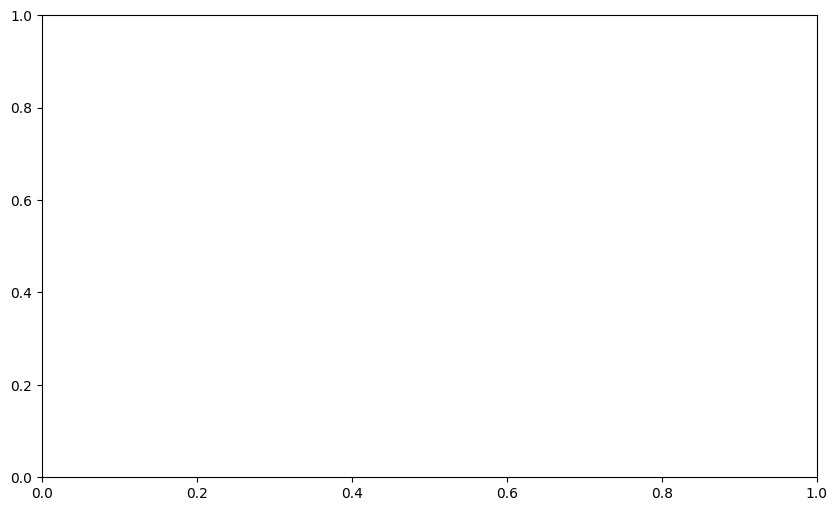

In [45]:
from summary_generator import generate_summary

# Generate Summary Dictionary
summary_dict=generate_summary(
    df=df,
    date_column=date_column,
    selected_date=selected_date,
    pkl_folder_name=pkl_folder_name,
)